# Imports

In [4]:
from numpy.random import seed
seed(888)

import tensorflow as tf
tf.compat.v1.set_random_seed(404)

In [2]:
import os
import numpy as np
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [8]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(x_train_all)

numpy.ndarray

# Explore the Data

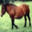

In [6]:
pic = array_to_img(x_train_all[7])
display(pic)

In [7]:
y_train_all[7][0]

7

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

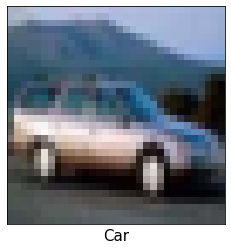

In [9]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

**Instructor Challenge:** My solution for it. With subplot picked up from instructor solution. 

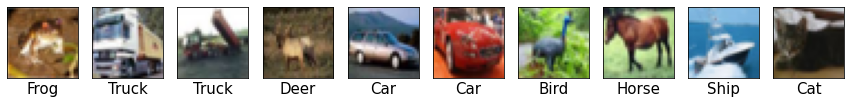

In [10]:
plt.figure(figsize=(15, 5))

for i in range(len(LABEL_NAMES)):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.imshow(x_train_all[i])

**Instuctor's Solution**

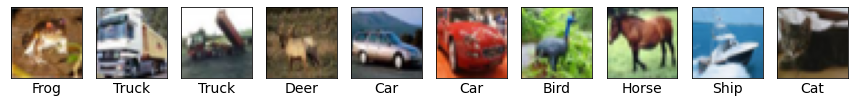

In [11]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [12]:
x_train_all[1].shape  #This shows us the current shape of the array format of the picture.

(32, 32, 3)

In [9]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


# Preprocess Data

In [14]:
x_train_all[0][0][0][0]

59

In [10]:
# We are scaling our numbers down so that they go between 0 and 1. For learning rate

x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 

In [16]:
x_train_all[0][0][0][0]

0.23137254901960785

In [11]:
# Flattening the inputs or array

x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [18]:
x_train_all.shape

(50000, 3072)

In [12]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [20]:
x_test.shape

(10000, 3072)

### Create Validation Dataset

In [13]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [14]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset(for illustration)

In [15]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [24]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output') # The nr of units for this final layer match the nr of image types we are classifying.
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [16]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [26]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m2_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m2_hidden2'))
model_3.add(Dense(16, activation='relu', name='m2_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m2_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [27]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [29]:
32*32*3*128+128 +(128*64+64) + (64*16+16) + (16*10 + 10)

402810

# Tensorboard (visualizing learning)

In [24]:
def get_tensorboard(model_name):

    folder_name =  f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)             # Setting up the path for TensorBoard.

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit The Model

In [22]:
sample_per_batch = 1000

In [39]:
#%%time
#nr_epochs = 150
#model_1.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs, 
#            callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 8s


In [42]:
#%%time
#nr_epochs = 150
#model_2.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs, 
#            callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 12s


In [32]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 4min 34s


In [25]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 7min 20s


In [34]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 7min 18s


# Making predictions on individual images

In [26]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [27]:
np.set_printoptions(precision=3)

In [28]:
model_2.predict(test)

array([[1.143e-02, 6.277e-03, 5.374e-02, 9.602e-02, 1.968e-01, 8.702e-02,
        4.559e-01, 9.128e-02, 1.727e-04, 1.377e-03]], dtype=float32)

In [29]:
model_2.predict(x_val).shape

(10000, 10)

In [30]:
np.argmax(model_2.predict(test), axis=-1)

array([6], dtype=int64)

In [59]:
#The below option is deprecated
#model_2.predict_classes(test)

In [31]:
y_val[0]

array([6], dtype=uint8)

In [32]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    print(f'For run {i+1}')
    print(f'The actual value is: {y_val[i][0]}')
    print(f'The predicted value is: {np.argmax(model_2.predict(test), axis=-1)[0]}')

For run 1
The actual value is: 6
The predicted value is: 6
For run 2
The actual value is: 9
The predicted value is: 1
For run 3
The actual value is: 9
The predicted value is: 9
For run 4
The actual value is: 4
The predicted value is: 6
For run 5
The actual value is: 1
The predicted value is: 8
For run 6
The actual value is: 1
The predicted value is: 7
For run 7
The actual value is: 2
The predicted value is: 6
For run 8
The actual value is: 7
The predicted value is: 7
For run 9
The actual value is: 8
The predicted value is: 8
For run 10
The actual value is: 3
The predicted value is: 9


# Evaluation

In [33]:
model_2.metrics_names

['loss', 'accuracy']

In [34]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4515 - accuracy: 0.4852
Test loss is 1.45 and test accuracy is 48.5%


## Confusion Matrix

In [35]:
predictions = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [36]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [37]:
conf_matrix

array([[628,  18,  54,  25,  35,  25,  22,  45, 129,  19],
       [ 72, 586,  28,  23,  14,  29,  26,  35, 104,  83],
       [ 84,  13, 356,  54, 187, 104, 100,  71,  21,  10],
       [ 49,  12,  96, 237,  76, 264, 134,  74,  29,  29],
       [ 61,   3, 135,  47, 459,  52, 120,  92,  28,   3],
       [ 26,   9,  99, 154,  85, 425,  84,  80,  26,  12],
       [  9,   7,  80,  69, 152,  63, 570,  28,  17,   5],
       [ 55,  10,  64,  49, 108,  86,  29, 570,  12,  17],
       [158,  51,  15,  30,  28,  39,   5,  18, 630,  26],
       [ 97, 178,  23,  37,  19,  27,  38,  69, 121, 391]], dtype=int64)

In [38]:
conf_matrix.max()

630

In [39]:
conf_matrix.min()

3

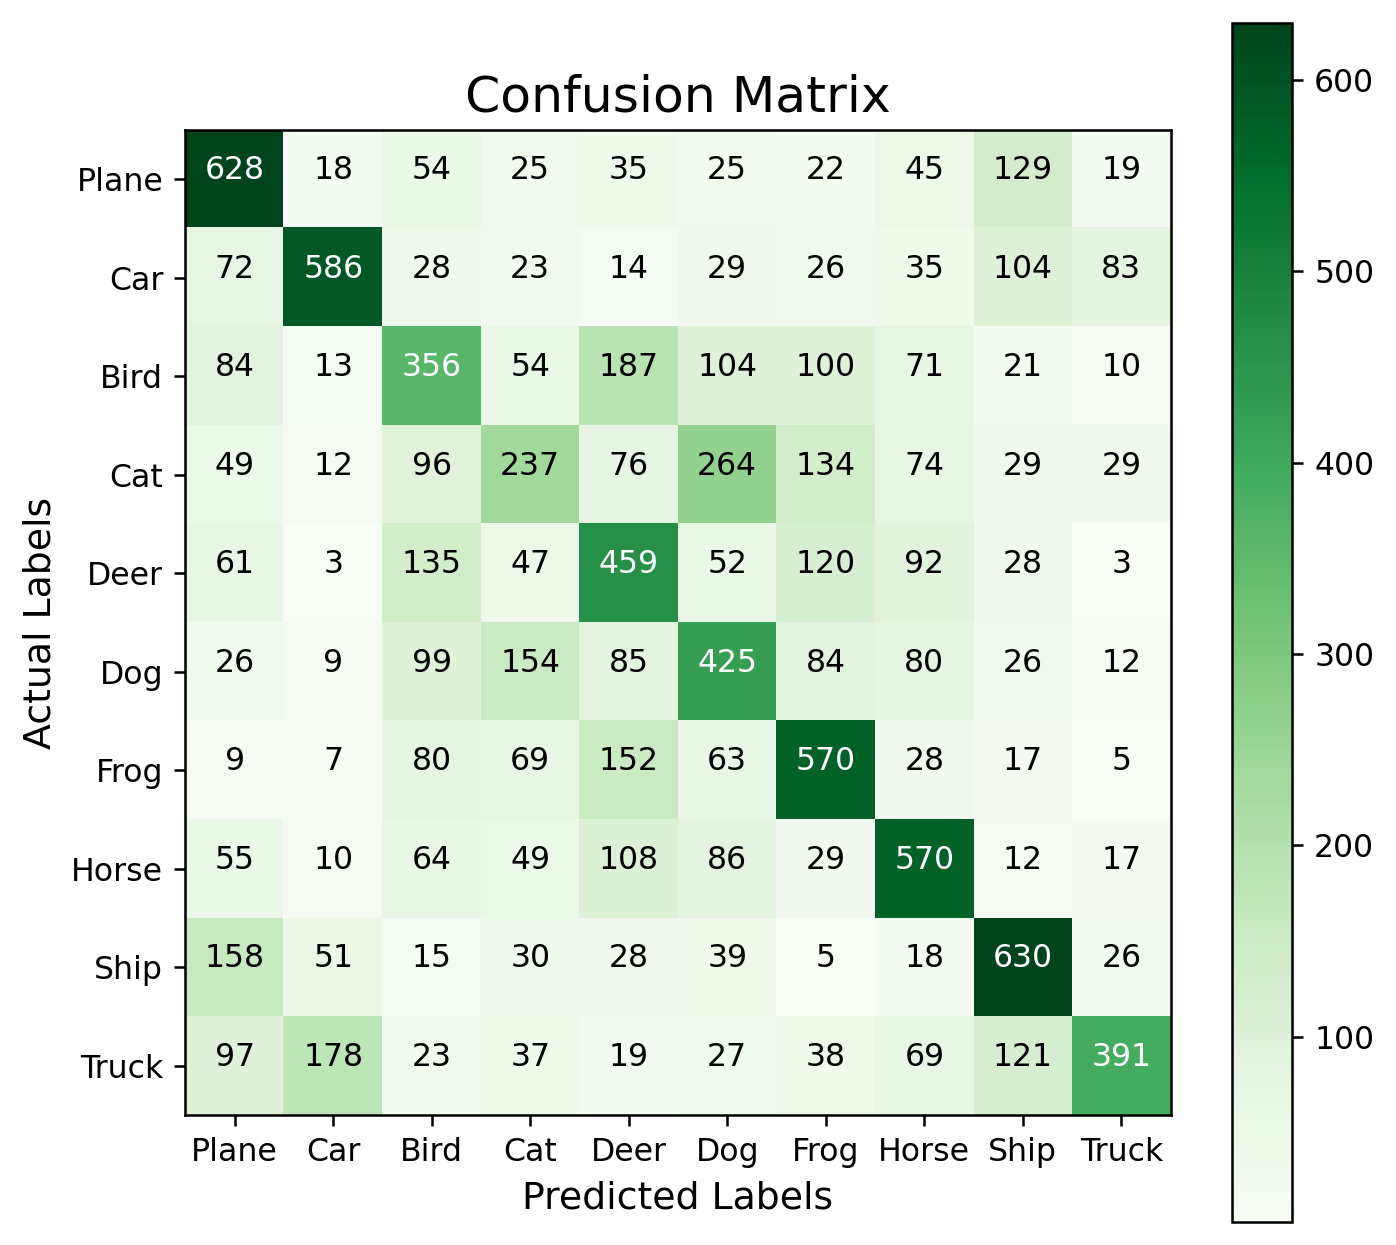

In [40]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In [41]:
# True Positives
np.diag(conf_matrix)

array([628, 586, 356, 237, 459, 425, 570, 570, 630, 391], dtype=int64)

In [42]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1) #Summing across rows.
recall

array([0.628, 0.586, 0.356, 0.237, 0.459, 0.425, 0.57 , 0.57 , 0.63 ,
       0.391])

In [45]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0) #Summing across columns
precision

array([0.507, 0.661, 0.375, 0.327, 0.395, 0.382, 0.505, 0.527, 0.564,
       0.657])

In [48]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 48.52%


In [49]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 48.99%


In [50]:
f_score = 2 * ((avg_precision*avg_recall) / (avg_precision+avg_recall))
print(f'Model 2 F-Score is {f_score:.2%}')

Model 2 F-Score is 48.75%
